In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import pandas as pd
import os


In [34]:
df = pd.read_table("../data/data.txt")
df.head()

,0
0,ሐምሌ 7 ቀን 1971 ዓ.ም. ዕለተ ቅዳሜ ከታላቁ ቤተ መንግሥት ምድር ቤ...
1,ከቀኑ 6፡00 ሰዓት ላይ ከእስረኛ ክፍል ቁጥር 2 የሚፈለጉት ሰዎች ሥም ...
2,”ልጅ ካሳ ወ/ማርያም፤ ብ/ጄ ሳሙኤል አበበ!” ከዚያም ”ወደ ውጭ ትፈለጋ...
3,በዚህ ጊዜ ልጅ ካሳ ወ/ማርያም ወደ ፓትርያርክ ቴዎፍሎስ ቀርበው፤
4,”አባታችን ሊገሉን ነው፤ ይፍቱኝ!” አሏቸው። እሳቸውም ”እግዚአብሔር ይፍ...


In [35]:
df.shape

(1146, 1)

In [36]:
#converting to list
lines = []
for index, row in df.iterrows():
    lines.append(row['0'])

lines[:5]

['ሐምሌ 7 ቀን 1971 ዓ.ም. ዕለተ ቅዳሜ ከታላቁ ቤተ መንግሥት ምድር ቤት እስረኞች መካከል የክርስትና እምነት ተከታዮች የሆኑት በጠዋት ተነስተው በአባቶች መሪነት ጸሎት አድርሰዋል። የቅድስት ሥላሴ ካቴድራል ደውል ድምፅ ሲያስተጋባ ሰምተዋል። ፈጣሪያቸውን አውቀው በድፍረት ሳያውቁ በስህተት የፈፀሙትን በደል ይቅር እንዲላቸው ተማጽነዋል። ከጸሎት በኋላ እስረኞቹ ጧት ፀሐይ ለመሞቅና አየር ለመቀበል የተፈቀደላቸው ለ45 ደቂቃ ጊዜ አጠናቀው ወደየክፍሎቻው ተመልሰው ተቆልፎባቸዋል። የሐምሌ ፀሐይ በቀዝቃዛው በታላቁ ቤተ መንግሥት ምድር ቤት ውስጥ የታጎሩትን ታላላቅ ኢትዮጵያውያን ለማጽናናት የተላከች ይመስላል፤ ሰማዩን በጋረደው ደመና መካከል ብልጭ ድርግም ትላለች።',
 'ከቀኑ 6፡00 ሰዓት ላይ ከእስረኛ ክፍል ቁጥር 2 የሚፈለጉት ሰዎች ሥም ዝርዝር በመጥራት፤ ”ራቅ ወዳለ ቦታ ስለምትሄዱ ብርድ ልብስ እና ሶፍት ያዙ” ተብሎ ተነገራቸው … በመቀጠልም ወደ ክፍል 1 በእስረኞች አለቃ አማካኝነት የሚፈልጉትን የእስረኛ ሥም መጥራት ጀመሩ …',
 '”ልጅ ካሳ ወ/ማርያም፤ ብ/ጄ ሳሙኤል አበበ!” ከዚያም ”ወደ ውጭ ትፈለጋላችሁ፤ የምትሄዱበት ራቅ ወደአለ ቦታ ስለሆነ የብርድ ልብስና የሽንት ቤት ወረቀት ያዙ ተብሏል” አሉ።',
 'በዚህ ጊዜ ልጅ ካሳ ወ/ማርያም ወደ ፓትርያርክ ቴዎፍሎስ ቀርበው፤',
 '”አባታችን ሊገሉን ነው፤ ይፍቱኝ!” አሏቸው። እሳቸውም ”እግዚአብሔር ይፍታ፤ አይዞህ አትፍራ ሥጋህን እንጂ ነፍስህን አይገድሏትም” አሏቸው። ልጅ ካሳ ወ/ማርያም መስቀል ተሳልመው ከወጡ ከጥቂት ጊዜ በኋላ ፓትርያርክ ቴዎፍሎስ ስማቸው ተጠራ። ፓትያርኩ ስማቸው ሲጠራ ከደረጃው ሥር ወዳለው መኝታቸው በመሔድ የሚፈልጉትን ልብስ መርጠው ከለበሱ በኋላ ጸሎት ማድረስ ጀመሩ፤ በዚህ ሁኔታ

In [37]:
#converting list to string
data = ""
for i in lines:
    data = ' '.join(lines)

data[:50]

'ሐምሌ 7 ቀን 1971 ዓ.ም. ዕለተ ቅዳሜ ከታላቁ ቤተ መንግሥት ምድር ቤት እስ'

In [38]:
#replacing unnecessary characters with space
data = data.replace('\n', ' ').replace('.', ' ').replace(
    ',', ' ').replace('"', ' ').replace(';', ' ').replace('!', ' ')
data = data.replace('?', ' ').replace('(', ' ').replace(')', ' ').replace(
    '--', ' ').replace('።', ' ').replace('፣', ' ')
data = data.replace(':', ' ').replace(
    '፤', ' ').replace('…', ' ').replace('”', ' ')

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:50]


'ሐምሌ 7 ቀን 1971 ዓ ም ዕለተ ቅዳሜ ከታላቁ ቤተ መንግሥት ምድር ቤት እስረ'

In [39]:
print(len(data.split()))

22001


In [40]:
len(data)

111487

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for prediction function
pickle.dump(tokenizer, open('../token/token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[520, 270, 29, 2783, 57, 51, 1448, 681, 2784, 227, 67, 333, 22, 271, 59]

In [42]:
len(sequence_data)

22094

In [43]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)


11369


In [44]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  22091


array([[ 520,  270,   29, 2783],
       [ 270,   29, 2783,   57],
       [  29, 2783,   57,   51],
       [2783,   57,   51, 1448],
       [  57,   51, 1448,  681],
       [  51, 1448,  681, 2784],
       [1448,  681, 2784,  227],
       [ 681, 2784,  227,   67],
       [2784,  227,   67,  333],
       [ 227,   67,  333,   22]])

In [45]:
x = []
y = []

for i in sequences:
    x.append(i[0:3])
    y.append(i[3])

x = np.array(x)
y = np.array(y)


In [46]:
print("Data: ", x[:10])
print("Response: ", y[:10])


Data:  [[ 520  270   29]
 [ 270   29 2783]
 [  29 2783   57]
 [2783   57   51]
 [  57   51 1448]
 [  51 1448  681]
 [1448  681 2784]
 [ 681 2784  227]
 [2784  227   67]
 [ 227   67  333]]
Response:  [2783   57   51 1448  681 2784  227   67  333   22]


In [47]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating our prediction model

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


In [49]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             113690    
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 11369)             11380369  
                                                                 
Total params: 24,543,059
Trainable params: 24,543,059
Non-trainable params: 0
_________________________________________________________________


Our Model Plot

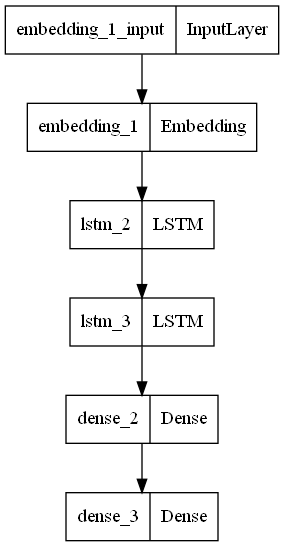

In [50]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


Building Our Model

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "../model/next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.010))
model.fit(x, y, epochs=5, batch_size=64, callbacks=[checkpoint])


Epoch 1/5
346/346 [==============================] - ETA: 0s - loss: 9.2472
Epoch 00001: loss improved from inf to 9.24717, saving model to ../model\next_words.h5
346/346 [==============================] - 215s 585ms/step - loss: 9.2472
Epoch 2/5
346/346 [==============================] - ETA: 0s - loss: 8.8182
Epoch 00002: loss improved from 9.24717 to 8.81821, saving model to ../model\next_words.h5
346/346 [==============================] - 269s 779ms/step - loss: 8.8182
Epoch 3/5
346/346 [==============================] - ETA: 0s - loss: 8.7645
Epoch 00003: loss improved from 8.81821 to 8.76451, saving model to ../model\next_words.h5
346/346 [==============================] - 250s 721ms/step - loss: 8.7645
Epoch 4/5
346/346 [==============================] - ETA: 0s - loss: 8.7493
Epoch 00004: loss improved from 8.76451 to 8.74928, saving model to ../model\next_words.h5
346/346 [==============================] - 239s 690ms/step - loss: 8.7493
Epoch 5/5
346/346 [=====================

Prediction

In [53]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('../model/next_words.h5')
tokenizer = pickle.load(open('../token/token.pkl', 'rb'))


def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word


In [ ]:
while(True):
    text = input("Enter Amharic phrase with 3 words minimum: ")
  
    if text == "0":
        print("Execution completed.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)
            
            Predict_Next_Words(model, tokenizer, text)
            
        except Exception as e:
            print("Error occurred: ",e)
            continue